In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv("Gotem Pumpkins.csv")
data_test = pd.read_csv("Freyja_Pumpkins.csv")

In [3]:
data_train.head()

,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [4]:
data_train = data_train.drop(['Unnamed: 0'],axis=1)
data_test = data_test.drop(['Unnamed: 0'],axis=1)

In [5]:
data_train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [6]:
data_train['Class']=data_train['Class'].astype('category')
data_train['Class']=data_train['Class'].cat.codes
data_test['Class']=data_test['Class'].astype('category')
data_test['Class']=data_test['Class'].cat.codes
data_train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,1
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,1
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,1
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,0
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [7]:
data_train.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [8]:
data_test.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [9]:
X_train = data_train.drop(['Class'],axis=1)
Y_train = data_train['Class']
X_test = data_test.drop(['Class'],axis=1)
Y_test = data_test['Class']

In [10]:
#feature scaling 
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [11]:
#defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
def gradient_descent(X_train, bias , alpha , iterations, Y_train ):
     X = np.array(X_train)
     y = np.array(Y_train)
    
     samples,columns=X.shape
     weights = np.zeros(columns)  # Initialize weights as zeroes
    
     y_pred=0
     y_pred_list =[]
     for i in range(iterations):
         z= (np.dot(X,weights)+bias)
# calculate the predicted values
         y_pred=sigmoid(z)

#calculating gradient descent 
         error = y_pred - y  
         dw = (1 / samples) * np.dot(X.T, error)
         db = (1 / samples) * np.sum(error)

 # Update weights and bias
         weights -= alpha * dw
         bias -= alpha * db

         y_pred_list.append(y_pred)
         if (i+1)%50==0:
             
             loss = -(y * np.log(y_pred +1e-10) + (1 - y) * np.log(1 - y_pred + 1e-10))
             print(f"Iteration {i+1}, Loss: {loss}")

     return weights, bias

    

In [13]:
alpha= 0.5
bias=0
iterations=1000
weights , bias= gradient_descent(X_train, bias , alpha , iterations, Y_train )

Iteration 50, Loss: [0.03114111 0.3346119  0.11496319 ... 0.04384112 0.24477732 0.23236814]
Iteration 100, Loss: [0.03005993 0.31099129 0.1134482  ... 0.04396882 0.23299915 0.27557957]
Iteration 150, Loss: [0.02993066 0.3059044  0.11329414 ... 0.04452224 0.23024212 0.27895627]
Iteration 200, Loss: [0.02984275 0.30391026 0.11313834 ... 0.04503624 0.22900586 0.27551339]
Iteration 250, Loss: [0.02974336 0.30252192 0.11295757 ... 0.04551702 0.22807351 0.27149566]
Iteration 300, Loss: [0.0296309  0.30130702 0.11276342 ... 0.04596984 0.22722275 0.26785754]
Iteration 350, Loss: [0.02950769 0.30018339 0.11256137 ... 0.04639781 0.22641074 0.2646753 ]
Iteration 400, Loss: [0.02937584 0.29913008 0.11235384 ... 0.04680321 0.22562739 0.26189567]
Iteration 450, Loss: [0.02923704 0.29813738 0.11214221 ... 0.04718795 0.22486869 0.25945641]
Iteration 500, Loss: [0.02909267 0.2971981  0.1119274  ... 0.04755367 0.22413196 0.25730356]
Iteration 550, Loss: [0.02894389 0.29630603 0.11171009 ... 0.04790181 0

In [14]:
print ("Final weight is: ",weights)
print ("Final bias is: ", bias)

Final weight is:  [ 0.73861194 -0.5000243   0.40859723 -0.61030149  0.67495191 -0.64149757
 -0.32603134  0.48911122  0.09240146 -0.40610989  1.34620682 -1.16421933]
Final bias is:  0.13173524618558527


In [15]:
#to generate predictions for both the files
def pred(X_train, weights, bias):
    X=np.array(X_train)
    z =(np.dot(X,weights)+bias)
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)


In [16]:
def acc(y_test, y_pred):
   
    # Convert to numpy arrays for consistency
    y_true = np.array(y_test)
    y_pred = np.array(y_pred)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(
    " For Freyja- Accuracy: {:.2f}%".format(accuracy * 100),
    "Precision: {:.2f}%".format(precision * 100),
    "Recall: {:.2f}%".format(recall * 100),
    "F1 Score: {:.2f}%".format(f1_score * 100)
)


In [17]:
y_prediction= pred(X_test,weights,bias)
acc(Y_test,y_prediction)

 For Freyja- Accuracy: 88.40% Precision: 85.95% Recall: 89.66% F1 Score: 87.76%


In [18]:
def confusion_matrix(y_test, y_pred):
   
    # Convert to numpy arrays for consistency
    y_true = np.array(y_test)
    y_pred = np.array(y_pred)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[TN, FP], [FN, TP]])

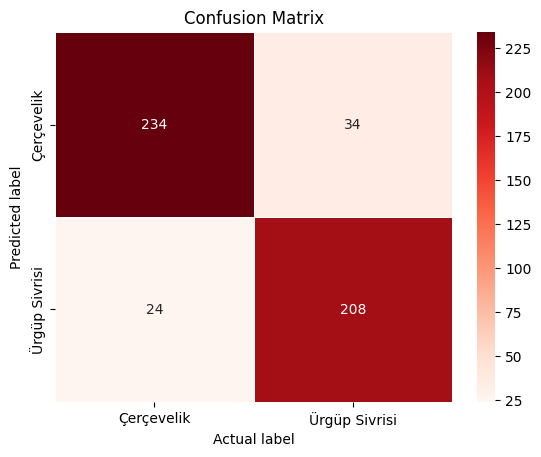

In [19]:
 cf_matrix=confusion_matrix(Y_test,y_prediction)
sns.heatmap(cf_matrix,annot=True,cmap="Reds",linewidth=0.5, fmt='d',yticklabels=['Çerçevelik','Ürgüp Sivrisi'],xticklabels=['Çerçevelik','Ürgüp Sivrisi'])
plt.title("Confusion Matrix")

plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.show()